In [77]:
%run "./1. Data Loading.ipynb"

X: (800, 360, 25)
Y: (800,)


In [78]:
import matplotlib.patches as mpatches

Subject 0: 100307
	Trial: 1
		Block 1: Neut condition starts at 10.982 and runs for 18.0 containing frames: (20, 45)
		Block 2: Fear condition starts at 32.053 and runs for 18.0 containing frames: (49, 74)
		Block 3: Neut condition starts at 53.125 and runs for 18.0 containing frames: (78, 103)
		Block 4: Fear condition starts at 74.196 and runs for 18.0 containing frames: (108, 133)
		Block 5: Neut condition starts at 95.267 and runs for 18.0 containing frames: (137, 162)
		Block 6: Fear condition starts at 116.338 and runs for 18.0 containing frames: (166, 176)


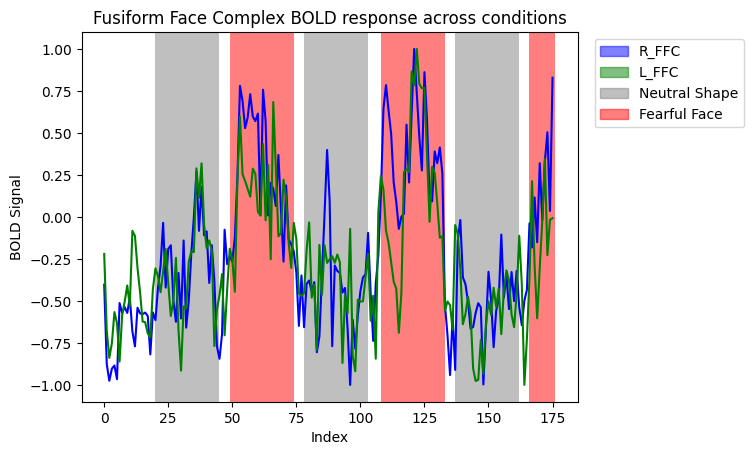

In [79]:
# Plot the first subject's FFC.
for subject_index, subject_id in enumerate(subjects):
    print(f"Subject {subject_index}: {subject_id}")
    
    for trial_index, trial in enumerate(manifest[subject_id]):
        print(f"\tTrial: {trial_index + 1}")

        plt.plot(trial["region_data"]["R_FFC"], color="blue")
        plt.plot(trial["region_data"]["L_FFC"], color="green")

        condition_patches = [
            mpatches.Patch(color="blue", alpha=0.5), 
            mpatches.Patch(color="green", alpha=0.5), 
            mpatches.Patch(color="gray", alpha=0.5), 
            mpatches.Patch(color="red", alpha=0.5)
            ]
        condition_labels = ["R_FFC", "L_FFC", "Neutral Shape", "Fearful Face"]

        for block_index, condition_dict in enumerate(trial["condition_spans"]): 
            print(f"\t\tBlock {block_index + 1}: {condition_dict['Condition']} condition starts at {condition_dict['Onset']} and runs for {condition_dict['Duration']} containing frames: {condition_dict['Frames']}")

            start_index = condition_dict['Frames'][0]
            end_index = condition_dict['Frames'][1]

            if condition_dict['Condition'] == "Neut":
                plt.axvspan(start_index, end_index, facecolor="gray", alpha=0.5)

            if condition_dict['Condition'] == "Fear":
                plt.axvspan(start_index, end_index, facecolor="red", alpha=0.5)

        plt.title('Fusiform Face Complex BOLD response across conditions')
        plt.xlabel('Index')
        plt.ylabel('BOLD Signal')

        plt.legend(handles=condition_patches, labels=condition_labels, bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.show()

        break
    break

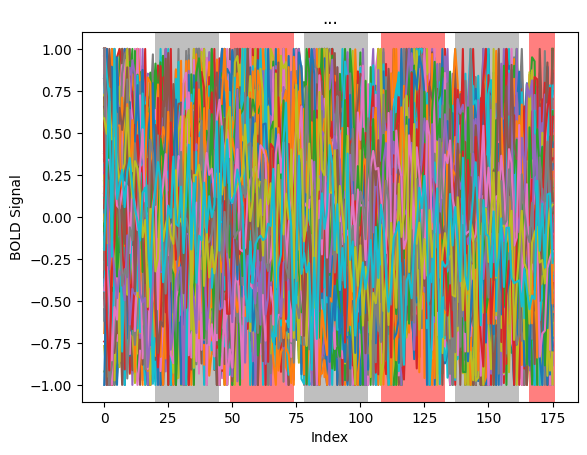

In [80]:
plt.title('...')

plt.axvspan(20, 45, facecolor="gray", alpha=0.5)
plt.axvspan(49, 74, facecolor="red", alpha=0.5)
plt.axvspan(78, 103, facecolor="gray", alpha=0.5)
plt.axvspan(108, 133, facecolor="red", alpha=0.5)
plt.axvspan(137, 162, facecolor="gray", alpha=0.5)
plt.axvspan(166, 176, facecolor="red", alpha=0.5)

for subject_index, subject_id in enumerate(subjects):
    for trial_index, trial in enumerate(manifest[subject_id]):
        for time_series in trial["data"]:
            plt.plot(time_series)
        break
    break

plt.xlabel('Index')
plt.ylabel('BOLD Signal')
plt.show()